In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Solvers import *
from TestProblems import *
from PlotFunctions import *

# Classical Runge-Kutta method

## Stability plot

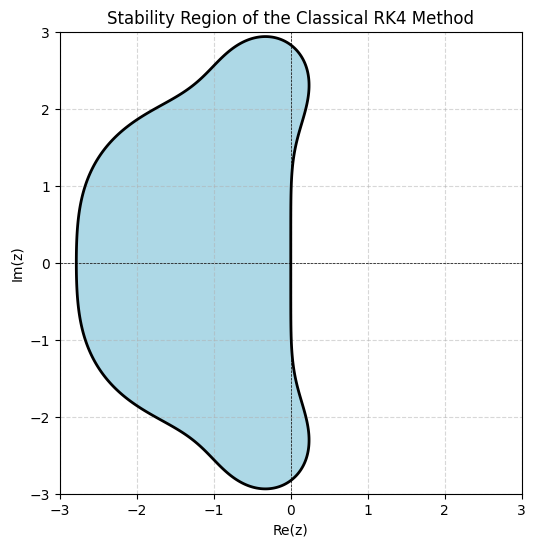

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_stability_function(z):
    """Compute the stability function for RK4."""
    return 1 + z + 0.5*z**2 + (1/6)*z**3 + (1/24)*z**4

# Generate a grid of complex numbers z = x + iy
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Compute the magnitude of the stability function
R = np.abs(rk4_stability_function(Z))

# Plot the stability region (where |R(z)| ≤ 1)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, R, levels=[0, 1], colors=['lightblue'])
plt.contour(X, Y, R, levels=[1], colors='k', linewidths=2)
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title('Stability Region of the Classical RK4 Method')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal')
plt.show()

## Test on test problems

### Prey-predator

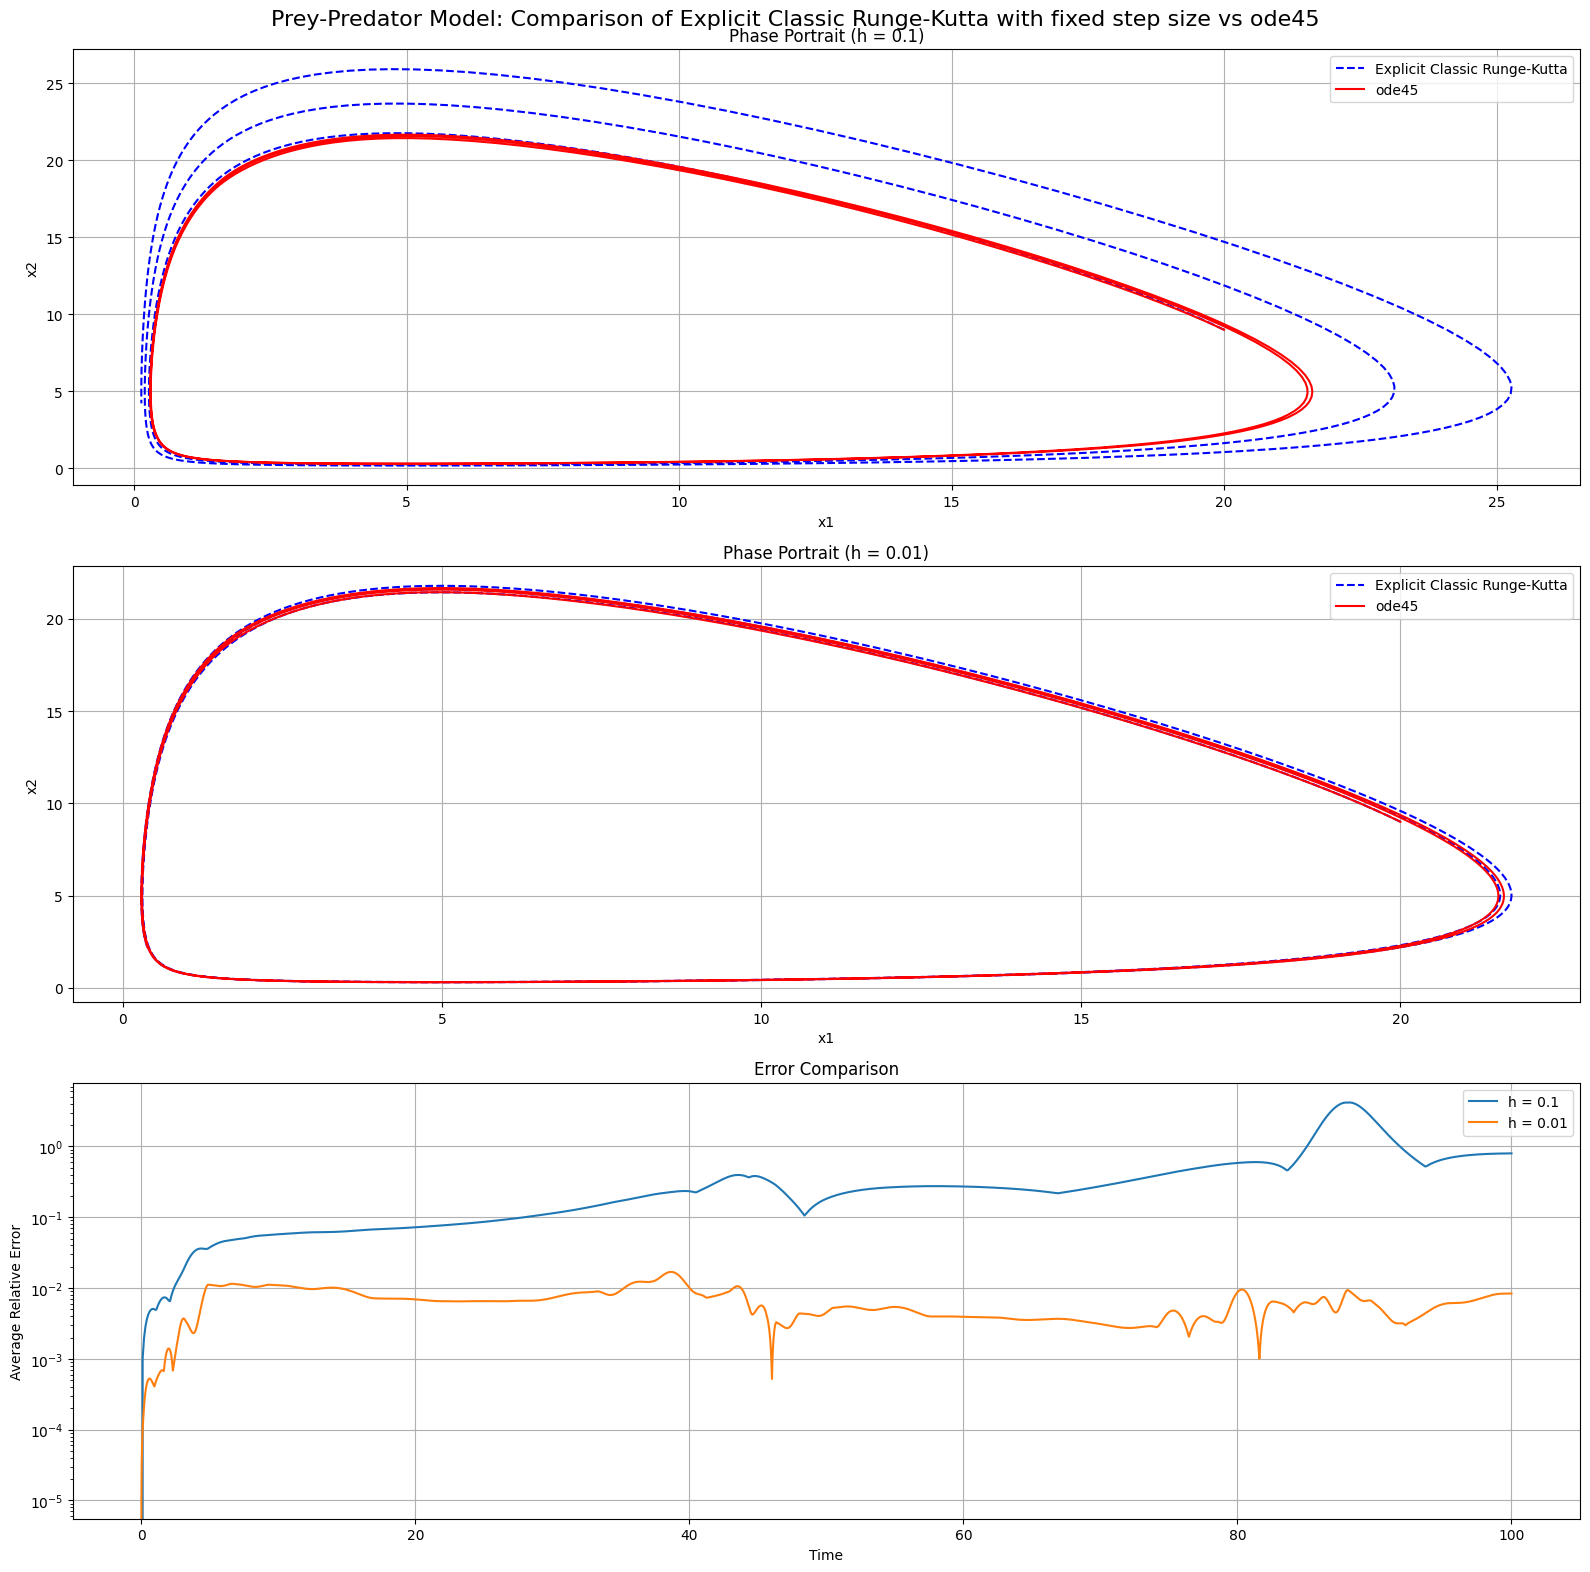

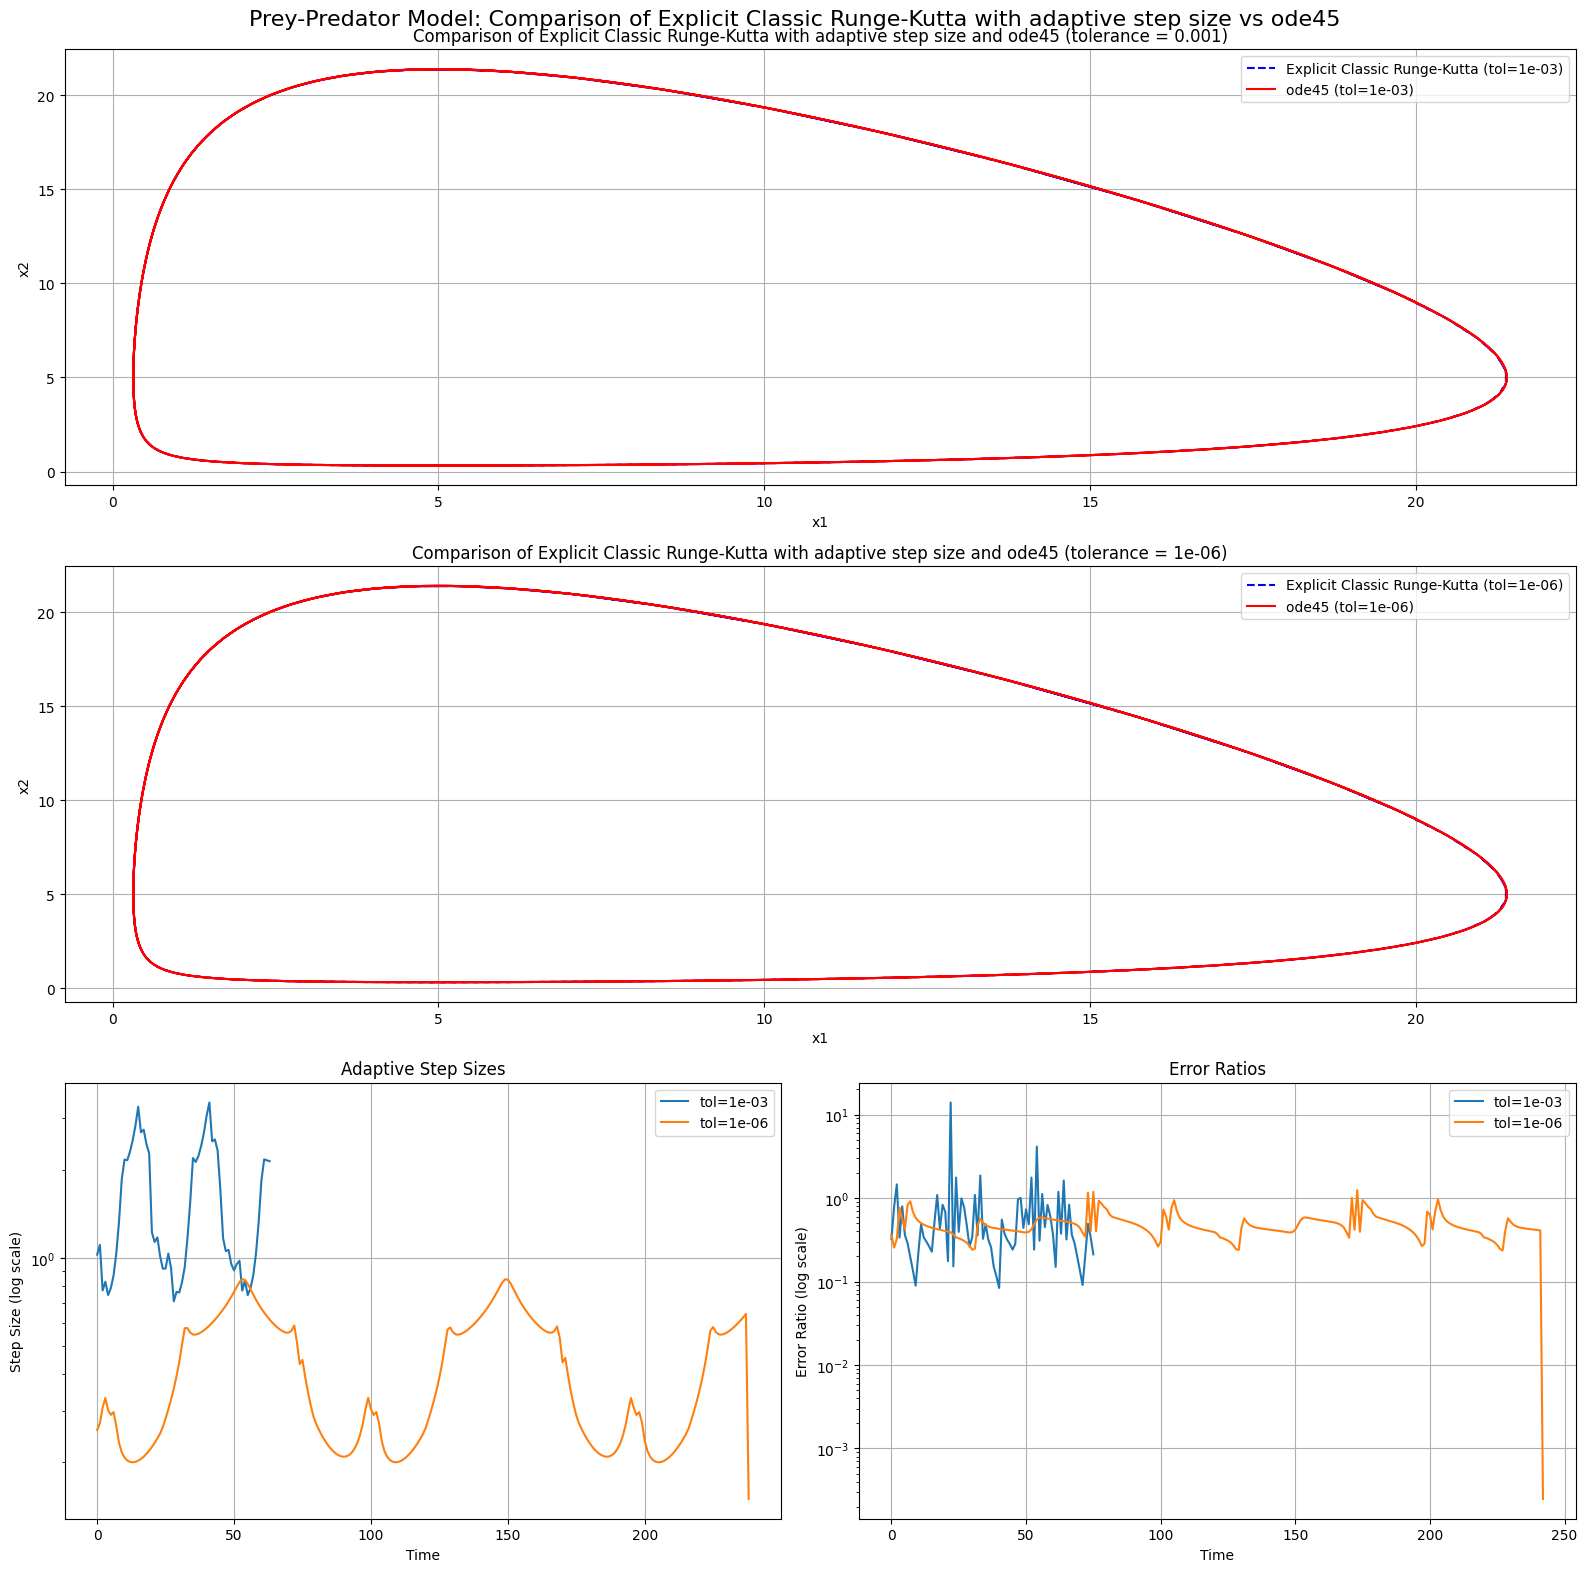

In [3]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate
pp_rk_fixed = compare_solvers(prey_predator_model, t_span, x0, params=(a, b), model_name="Prey-Predator Model", reference_solver_name = "ode45", fixed_steps=True, explicit=True, rk45=True)
pp_rk_adaptive = compare_solvers(prey_predator_model, t_span, x0, params=(a, b), model_name="Prey-Predator Model", reference_solver_name = "ode45", adaptive_steps= True, explicit=True, rk45=True, steptype = "adaptive")


### CSTR 1 state

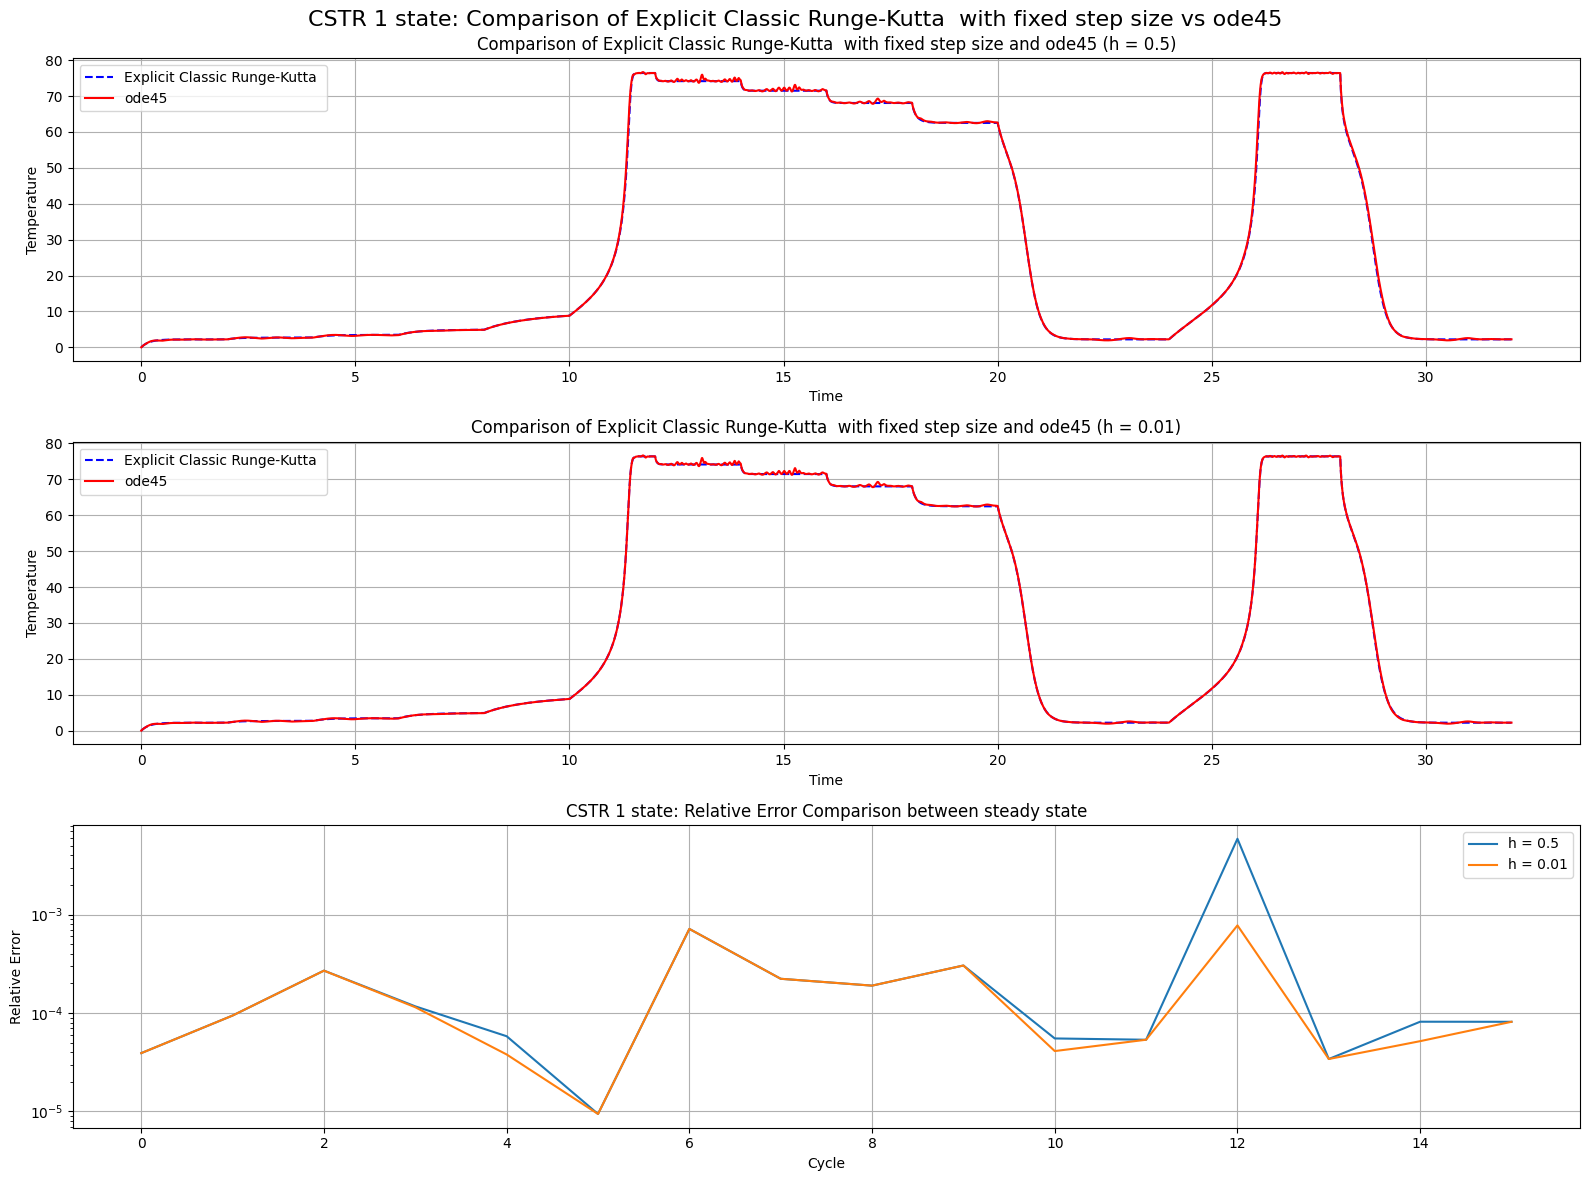

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/Solvers.py:514: RuntimeWarning: divide by zero encountered in scalar divide
  h = min(hmax, max(hmin, 0.9 * h * (epstol / r)**0.2))


<Figure size 1600x1200 with 0 Axes>

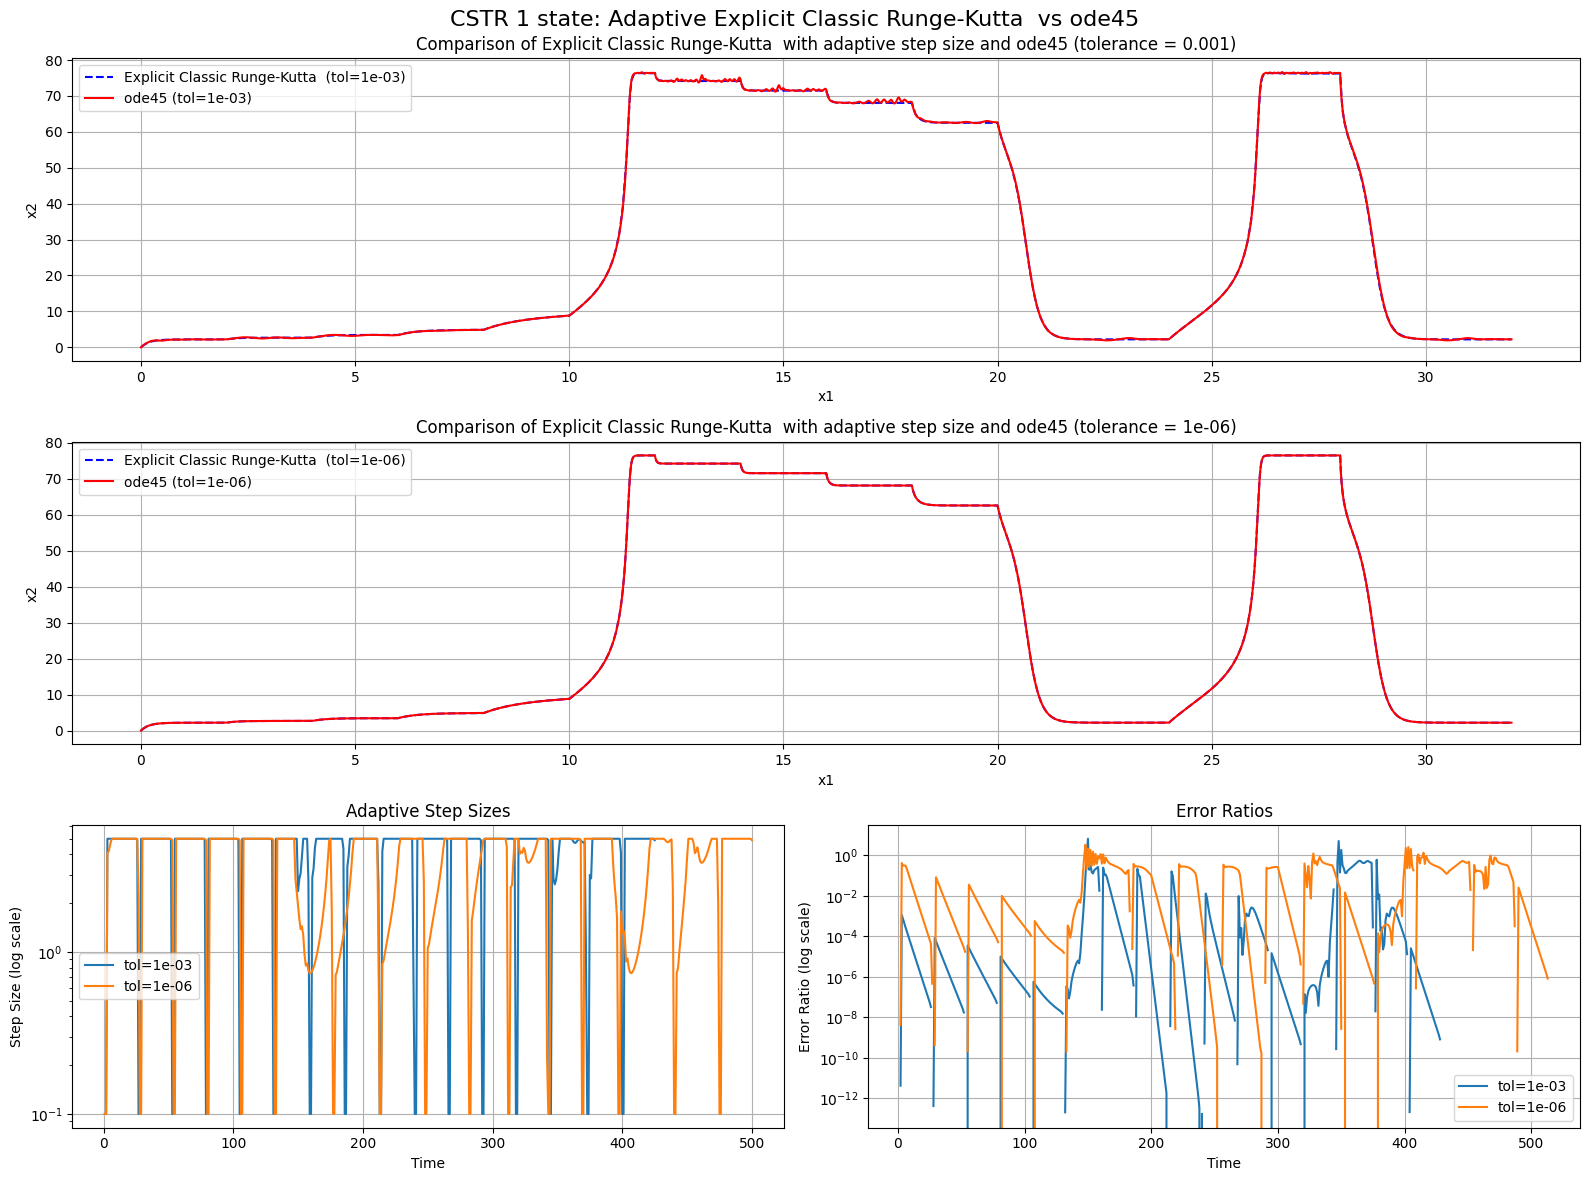

In [4]:
t_span = (0, 120)
cstr_rk_fixed = compare_solvers_cstr(CSTR_1state_model, t_span,  model_name="CSTR 1 state", fixed_steps=True, explicit=True, rk45=True, fixed_step_sizes=[0.5, 0.01])
cstr_rk_adaptive = compare_solvers_cstr(CSTR_1state_model, t_span,  model_name="CSTR 1 state",  adaptive_steps=True, explicit=True, rk45=True, steptype = "adaptive")

### PFR 3 state

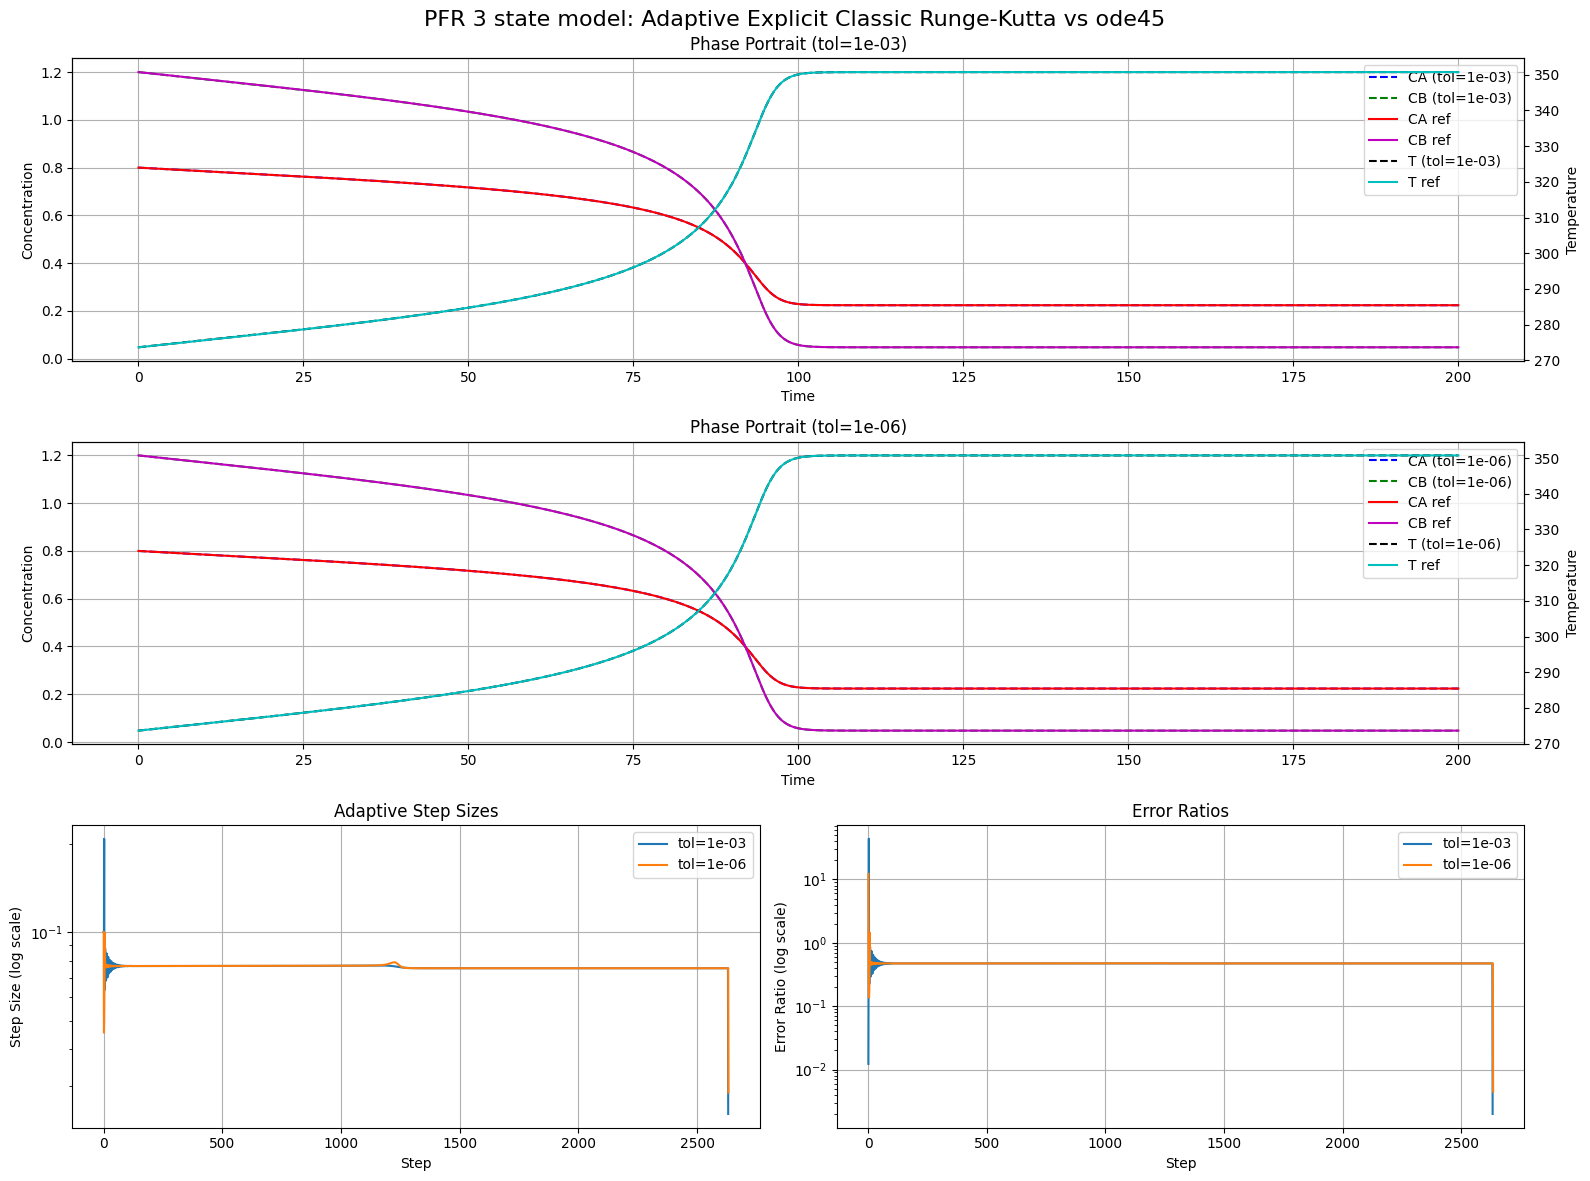

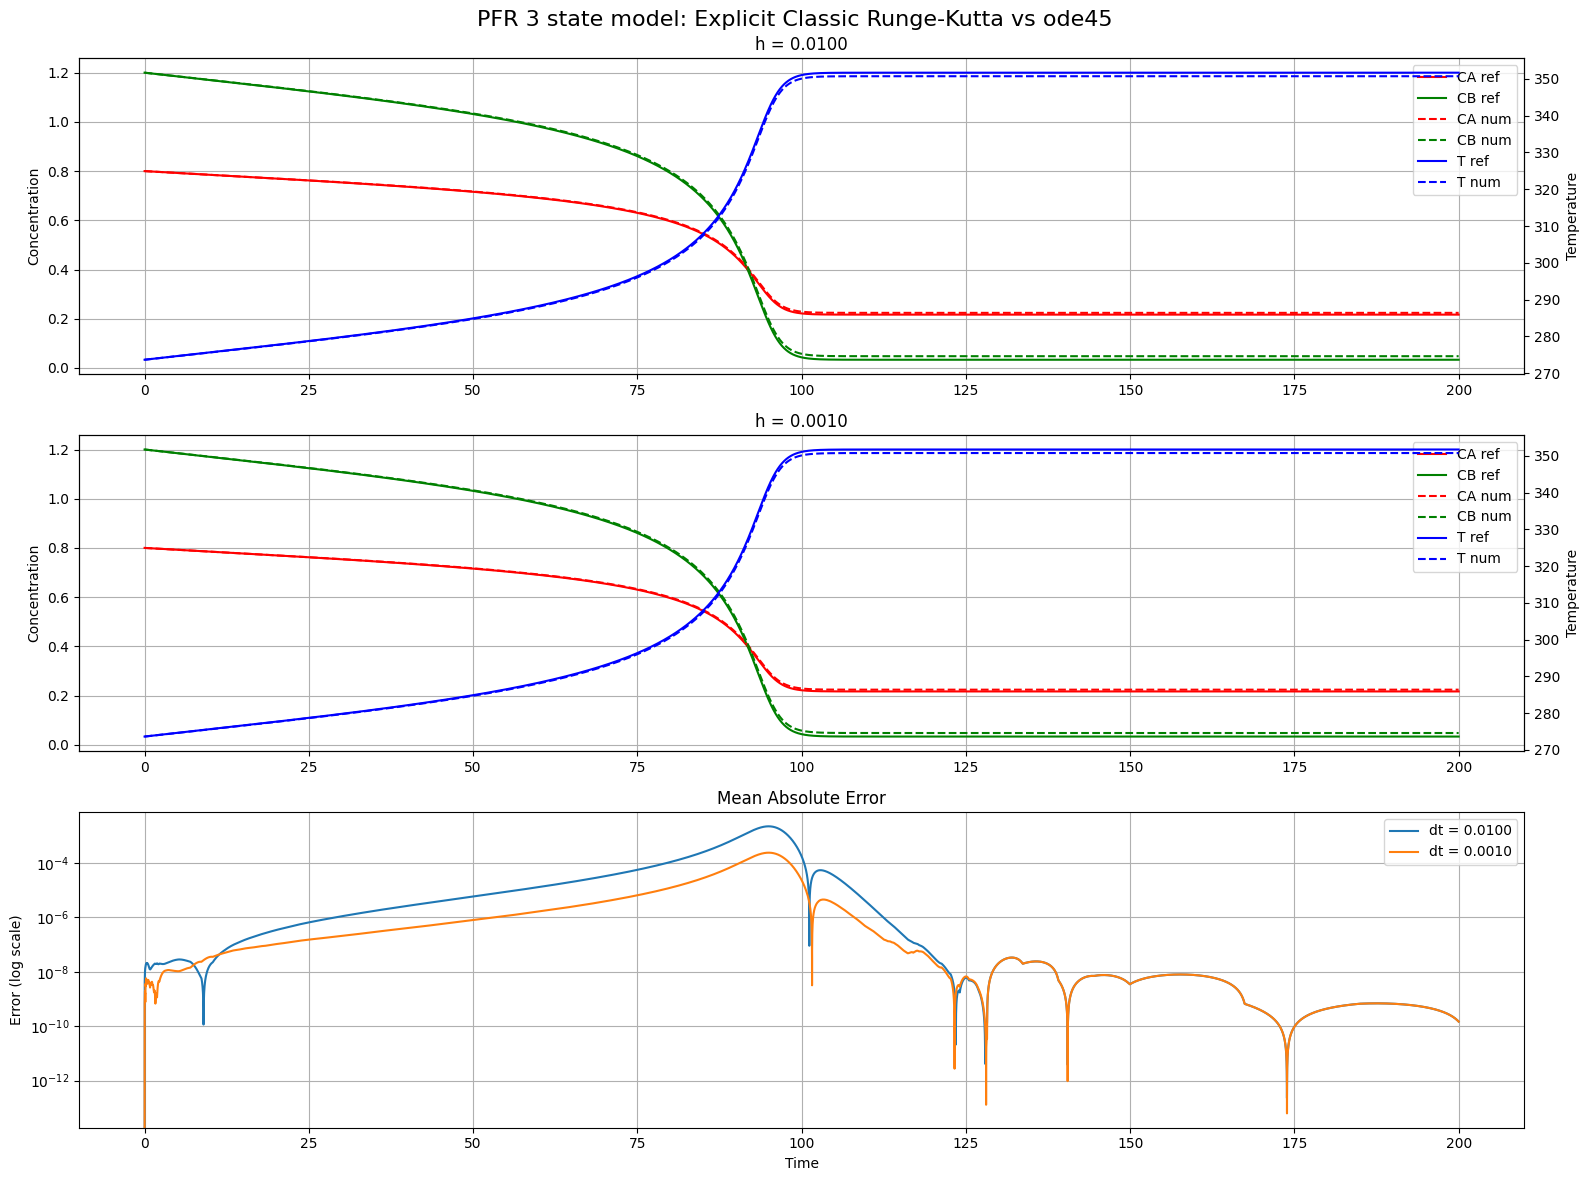

In [5]:
# Initial condition
n = 5  # number of spatial points

Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
x0 = np.concatenate([
    np.ones(n) * CA_in,    # CA initial
    np.ones(n) * CB_in,    # CB initial
    Tin*np.ones(n)  # T initial
])
t_span = (0, 200)

pfr_rk_adaptive = compare_solvers_pfr(PFR_3state_model, t_span, x0, model_name = "PFR 3 state model", reference_solver_name="ode45", adaptive_steps = True, explicit = True, rk45 = True, n = n)
pfr_rk_fixed = compare_solvers_pfr(PFR_3state_model, t_span, x0, model_name = "PFR 3 state model", reference_solver_name="ode45", fixed_steps = True, explicit = True, rk45 = True, n = n, fixed_step_sizes=[0.01, 0.001])

## Summary

In [6]:
print("Explicit Classic Runge-Kutta with adaptive step size:")
print("")
print("Prey-Predator Model, tolerance = 0.001")
print("Accepted steps: ", pp_rk_adaptive[0.001]['n_accept'])
print("Rejected steps: ", pp_rk_adaptive[0.001]['n_reject'])
print("Total number of steps: ", pp_rk_adaptive[0.001]['n_accept'] + pp_rk_adaptive[0.001]['n_reject'])
print("Total number of steps for ode45: ", pp_rk_adaptive[0.001]['ref_nfun'])
print("")
print("Prey-Predator Model, tolerance = 1e-6")
print("Accepted steps: ", pp_rk_adaptive[1e-6]['n_accept'])
print("Rejected steps: ", pp_rk_adaptive[1e-6]['n_reject'])
print("Total number of steps: ", pp_rk_adaptive[1e-6]['n_accept'] + pp_rk_adaptive[1e-6]['n_reject'])
print("Total number of steps for ode45: ", pp_rk_adaptive[1e-6]['ref_nfun'])
print("")
print("CSTR 1 state, tolerance = 0.001")
print("Accepted steps: ", cstr_rk_adaptive[0.001]['n_accept'])
print("Rejected steps: ", cstr_rk_adaptive[0.001]['n_reject'])
print("Total number of steps: ", cstr_rk_adaptive[0.001]['n_accept'] + cstr_rk_adaptive[0.001]['n_reject'])
print("Total number of steps for ode45: ", cstr_rk_adaptive[0.001]['ref_nfun'])
print("")
print("CSTR 1 state, tolerance = 1e-6")
print("Accepted steps: ", cstr_rk_adaptive[1e-6]['n_accept'])
print("Rejected steps: ", cstr_rk_adaptive[1e-6]['n_reject'])
print("Total number of steps: ", cstr_rk_adaptive[1e-6]['n_accept'] + cstr_rk_adaptive[1e-6]['n_reject'])
print("Total number of steps for ode45: ", cstr_rk_adaptive[1e-6]['ref_nfun'])
print("")
print("PFR 3 state, tolerance = 0.001")
print("Accepted steps: ", pfr_rk_adaptive[0.001]['n_accept'])
print("Rejected steps: ", pfr_rk_adaptive[0.001]['n_reject'])
print("Total number of steps: ", pfr_rk_adaptive[0.001]['n_accept'] + pfr_rk_adaptive[0.001]['n_reject'])
print("Total number of steps for ode45: ", pfr_rk_adaptive[0.001]['ref_nfun'])
print("")
print("PFR 3 state, tolerance = 1e-6")
print("Accepted steps: ", pfr_rk_adaptive[1e-6]['n_accept'])
print("Rejected steps: ", pfr_rk_adaptive[1e-6]['n_reject'])
print("Total number of steps: ", pfr_rk_adaptive[1e-6]['n_accept'] + pfr_rk_adaptive[1e-6]['n_reject'])
print("Total number of steps for ode45: ", pfr_rk_adaptive[1e-6]['ref_nfun'])
print("")

Explicit Classic Runge-Kutta with adaptive step size:

Prey-Predator Model, tolerance = 0.001
Accepted steps:  65
Rejected steps:  12
Total number of steps:  77
Total number of steps for ode45:  242

Prey-Predator Model, tolerance = 1e-6
Accepted steps:  240
Rejected steps:  4
Total number of steps:  244
Total number of steps for ode45:  734

CSTR 1 state, tolerance = 0.001
Accepted steps:  50
Rejected steps:  0
Total number of steps:  50
Total number of steps for ode45:  1148

CSTR 1 state, tolerance = 1e-6
Accepted steps:  50
Rejected steps:  0
Total number of steps:  50
Total number of steps for ode45:  2914

PFR 3 state, tolerance = 0.001
Accepted steps:  2631
Rejected steps:  1
Total number of steps:  2632
Total number of steps for ode45:  614

PFR 3 state, tolerance = 1e-6
Accepted steps:  2632
Rejected steps:  2
Total number of steps:  2634
Total number of steps for ode45:  614

